##Install packages and libraries, and download file

In [1]:
!pip install scikit-learn numpy
!pip install scikit-learn category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00


In [2]:
#Import libraries

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from scipy import stats

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import itertools

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Read CSV file
df = pd.read_csv('svoc_supermarket.csv')

##Explore data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_code              500 non-null    object 
 1   first_shop_date        500 non-null    object 
 2   last_shop_date         500 non-null    object 
 3   previous_shop_date     493 non-null    object 
 4   dur_from_last_date     500 non-null    int64  
 5   weekday_count          500 non-null    int64  
 6   holiday_count          500 non-null    int64  
 7   shop_morning_count     500 non-null    int64  
 8   shop_afternoon_count   500 non-null    int64  
 9   shop_evening_count     500 non-null    int64  
 10  shop_night_count       500 non-null    int64  
 11  no_of_visit            500 non-null    int64  
 12  mtbp                   500 non-null    float64
 13  no_visit_week          500 non-null    int64  
 14  avg_weekly_visit       500 non-null    float64
 15  percen

In [5]:
df.tail()

,cust_code,first_shop_date,last_shop_date,previous_shop_date,dur_from_last_date,weekday_count,holiday_count,shop_morning_count,shop_afternoon_count,shop_evening_count,...,prop_basket_m,prop_basket_l,prop_small_shop,prop_full_shop,prop_top_up,avg_dom_fresh_spend,avg_dom_mixed_spend,avg_dom_grocery_spend,avg_dom_nonfood_spend,cust_lifestage
495,CUST0000583261,8/1/2006,5/4/2008,4/22/2008,63,17,6,4,7,6,...,4.70,15.10,2.60,9.70,7.80,19.12,46.66,24.88,0.00,YF
496,CUST0000633617,9/2/2006,6/28/2008,6/18/2008,8,15,8,4,6,7,...,4.00,18.00,3.67,10.22,8.33,54.34,17.81,5.80,5.65,OT
497,CUST0000461259,4/8/2007,7/6/2008,5/8/2008,0,24,11,5,14,6,...,8.86,0.00,9.43,0.00,2.57,11.53,4.75,9.51,1.35,OT
498,CUST0000029089,7/21/2006,5/14/2008,5/11/2008,53,20,7,4,17,5,...,3.44,16.11,3.33,4.67,11.44,50.82,25.33,7.32,0.00,OF
499,CUST0000527725,5/10/2007,7/5/2008,6/5/2008,1,18,7,4,10,1,...,3.71,22.29,2.57,7.57,16.71,37.82,36.90,32.38,0.34,OF


In [6]:
df.describe()

,dur_from_last_date,weekday_count,holiday_count,shop_morning_count,shop_afternoon_count,shop_evening_count,shop_night_count,no_of_visit,mtbp,no_visit_week,...,prop_basket_s,prop_basket_m,prop_basket_l,prop_small_shop,prop_full_shop,prop_top_up,avg_dom_fresh_spend,avg_dom_mixed_spend,avg_dom_grocery_spend,avg_dom_nonfood_spend
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,98.968000,8.546000,3.342000,2.272000,4.468000,2.884000,2.436000,11.888000,55.943160,10.294000,...,0.857360,3.412360,9.166600,3.271000,5.236280,4.898680,16.929340,19.406640,8.567260,2.754600
std,138.994035,5.087992,2.274948,2.610679,3.675867,2.623033,3.071281,6.714583,36.863879,5.419068,...,1.038996,2.885973,12.291419,2.846806,10.763189,5.094657,16.905579,22.557118,15.594255,6.346728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,5.000000,2.000000,0.000000,2.000000,1.000000,0.000000,7.000000,32.030000,6.000000,...,0.200000,1.400000,0.000000,1.400000,0.000000,0.150000,5.812500,2.615000,0.000000,0.000000
50%,46.000000,8.000000,3.000000,1.000000,4.000000,2.000000,1.000000,11.000000,49.120000,9.000000,...,0.670000,2.790000,4.870000,2.600000,0.000000,3.845000,11.175000,12.065000,3.365000,0.000000
75%,93.250000,12.000000,5.000000,3.000000,6.000000,4.000000,3.250000,16.000000,71.127500,14.000000,...,1.200000,4.607500,13.355000,4.250000,6.062500,7.425000,22.442500,28.132500,9.865000,3.127500
max,728.000000,27.000000,11.000000,19.000000,23.000000,12.000000,16.000000,37.000000,258.000000,22.000000,...,13.500000,18.250000,98.500000,24.500000,98.500000,37.600000,99.650000,169.760000,155.080000,84.960000


dur_from_last_date: 


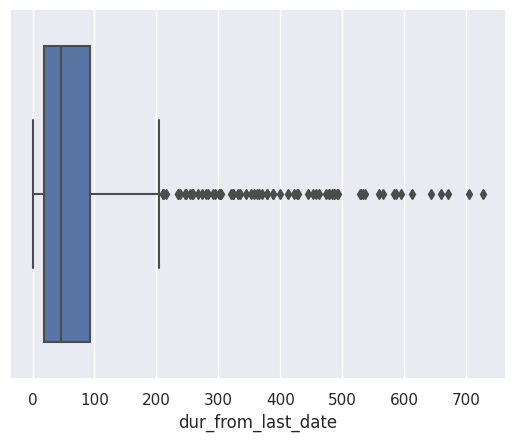

weekday_count: 


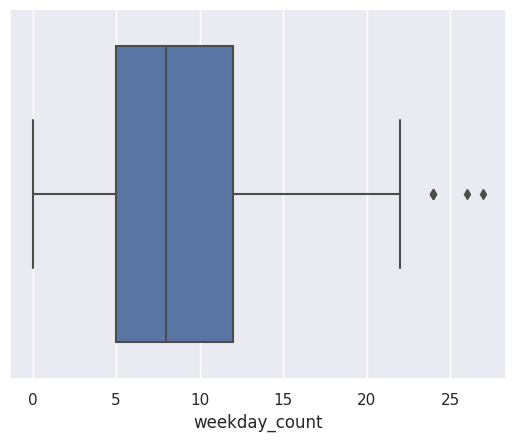

holiday_count: 


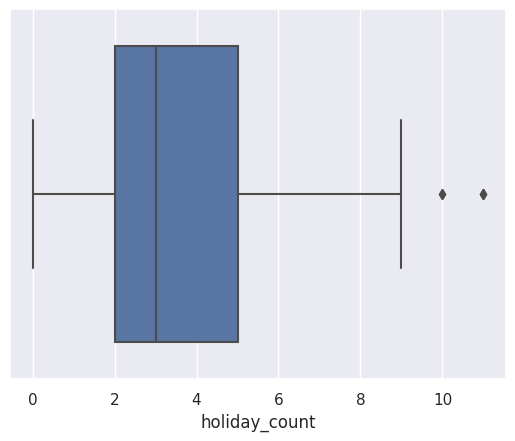

shop_morning_count: 


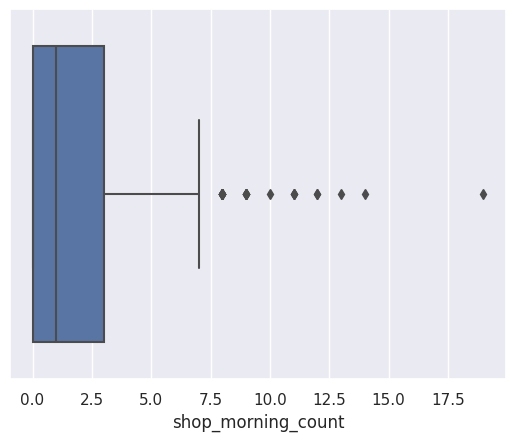

shop_afternoon_count: 


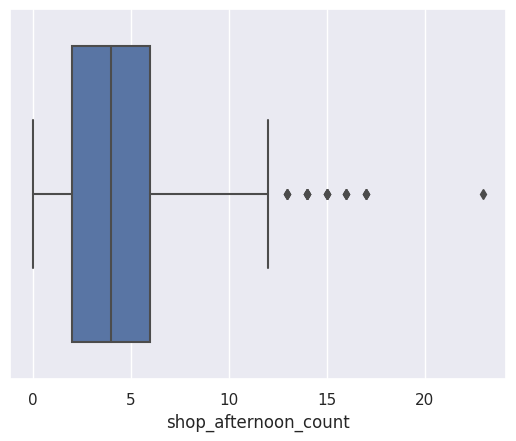

shop_evening_count: 


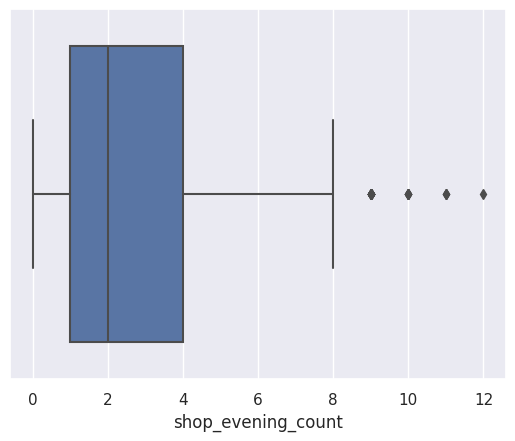

shop_night_count: 


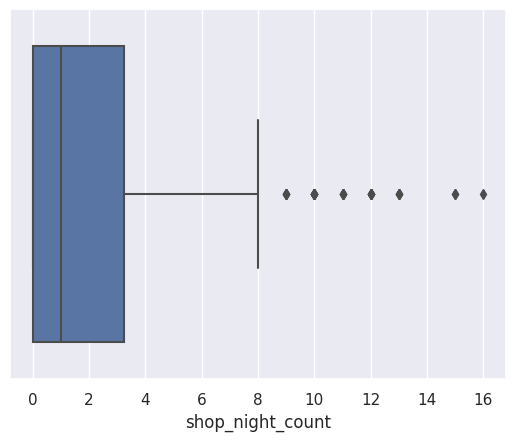

no_of_visit: 


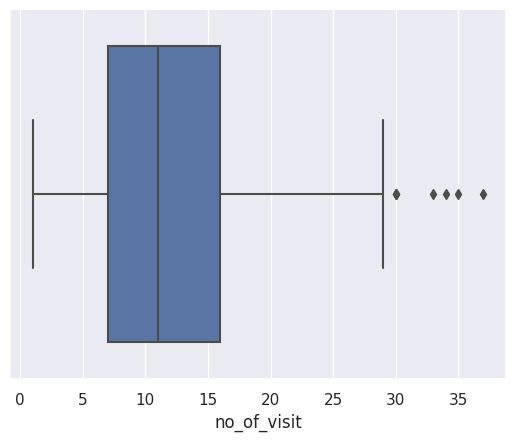

mtbp: 


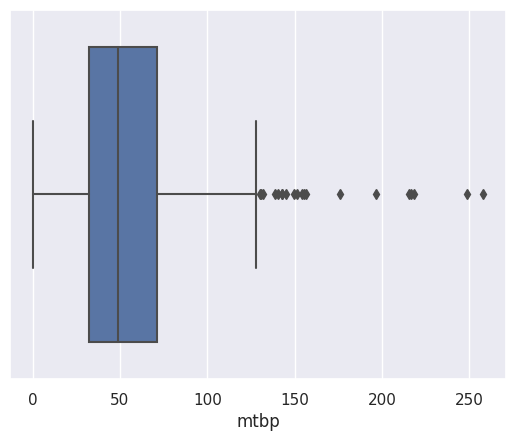

no_visit_week: 


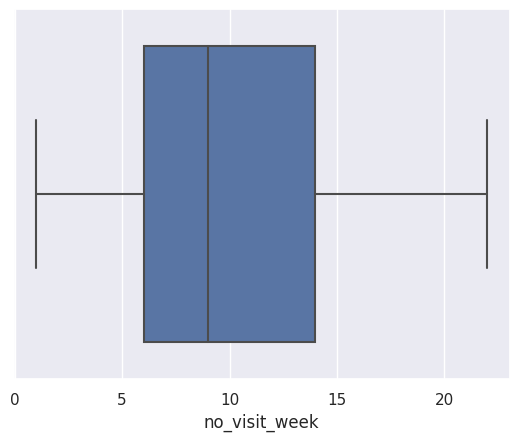

avg_weekly_visit: 


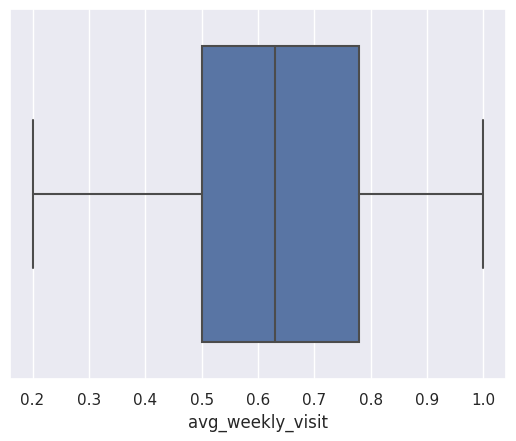

percent_active_weeks: 


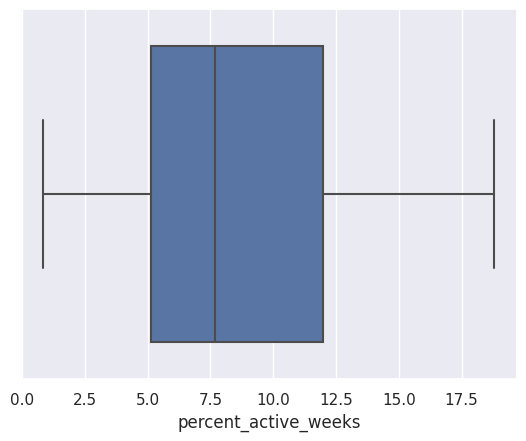

total_spend: 


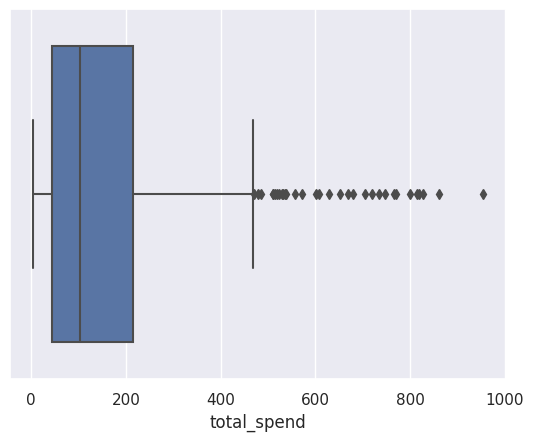

avg_weekly_spend: 


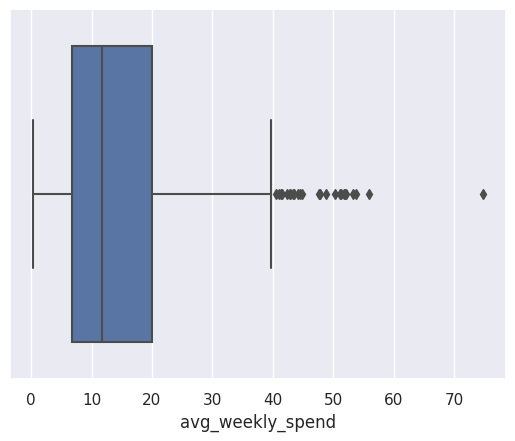

avg_spend: 


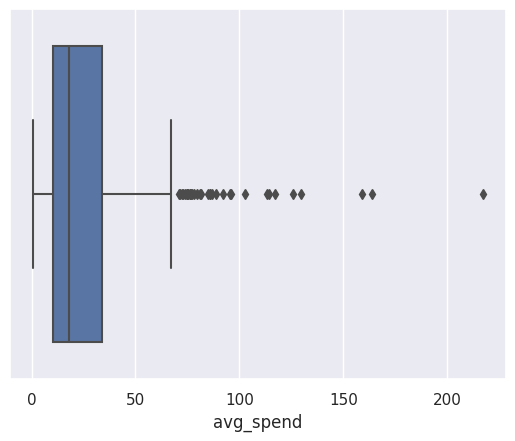

std_spend: 


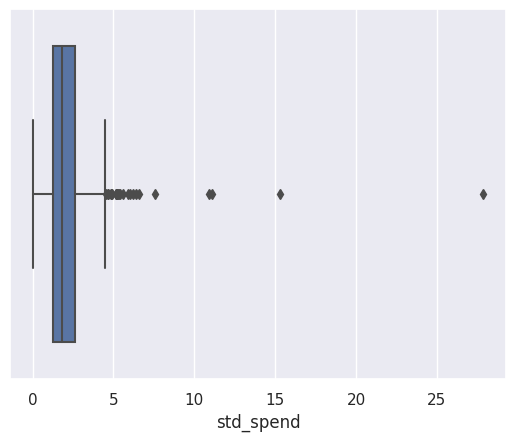

spend_last_1_mth: 


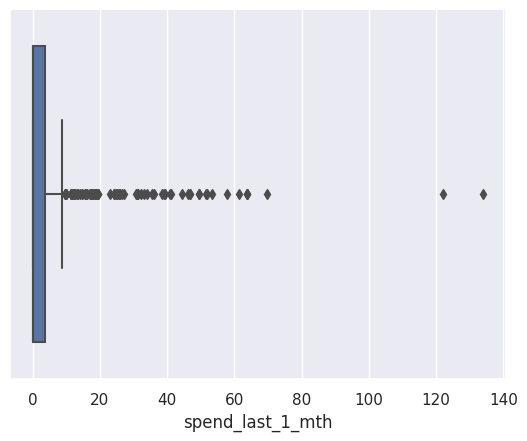

spend_last_3_mth: 


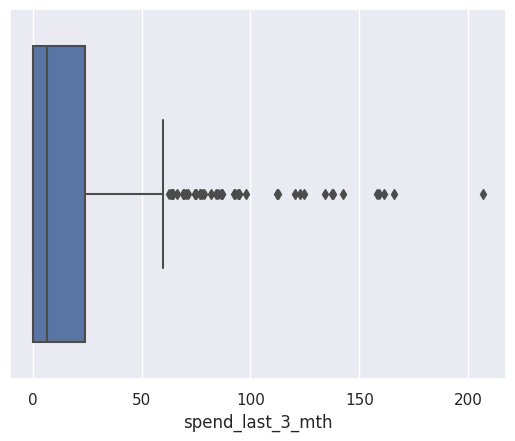

spend_last_6_mth: 


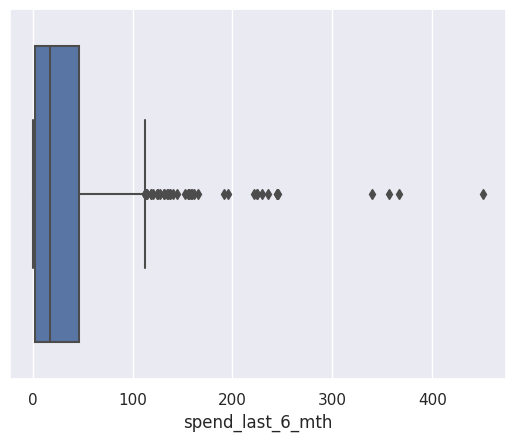

arpu: 


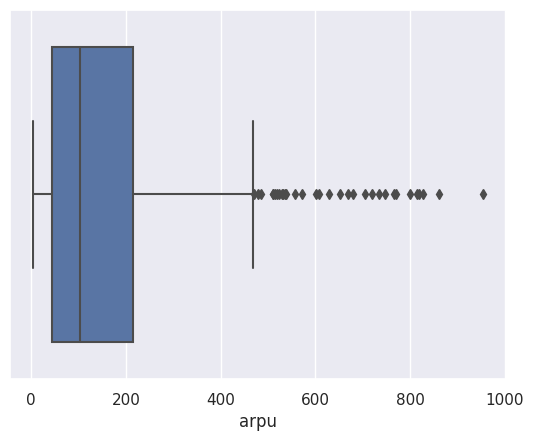

avg_prod40_d1_spend: 


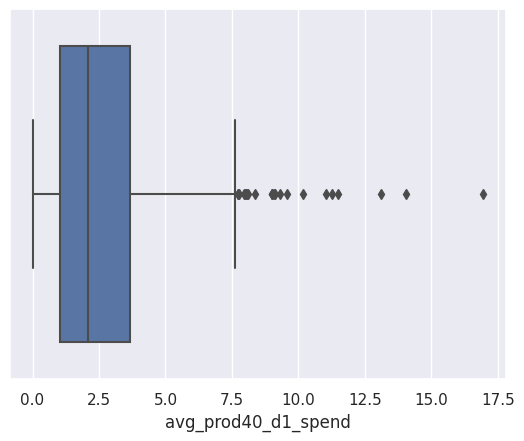

avg_prod40_d2_spend: 


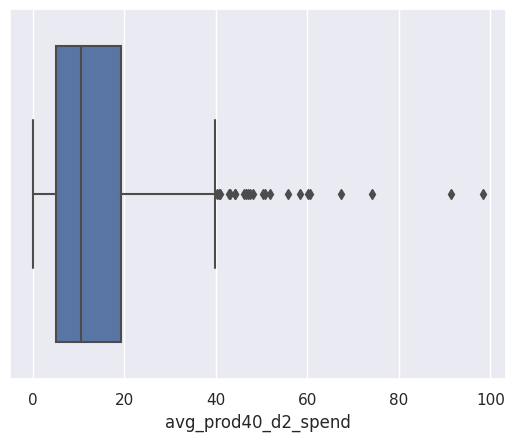

avg_prod40_d3_spend: 


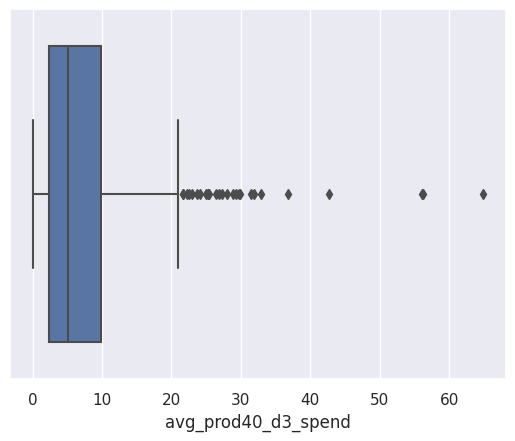

avg_prod40_d4_spend: 


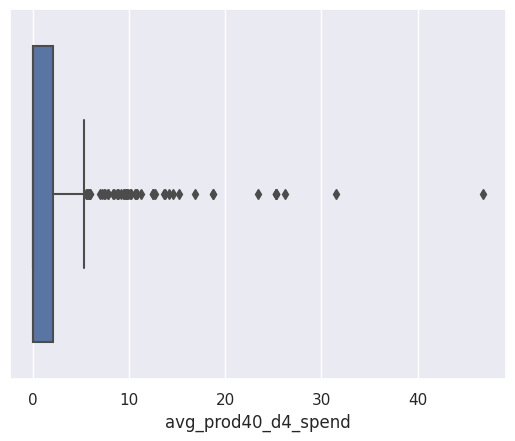

avg_prod40_d5_spend: 


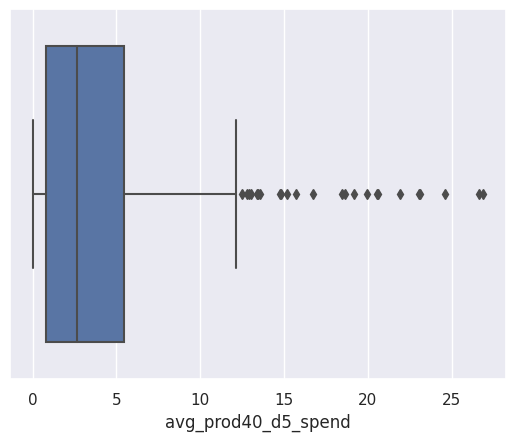

avg_prod40_d6_spend: 


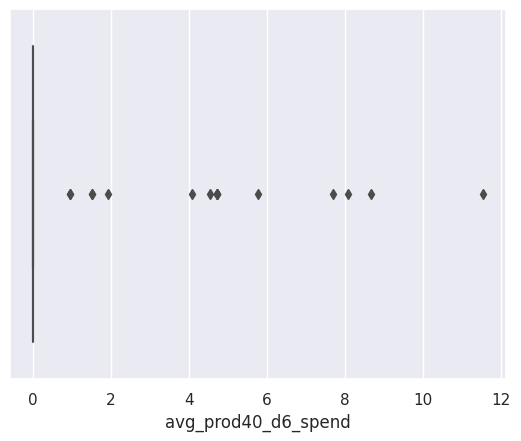

avg_prod40_d7_spend: 


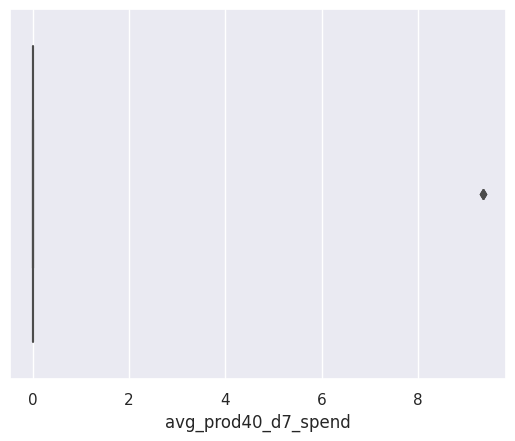

avg_prod40_d8_spend: 


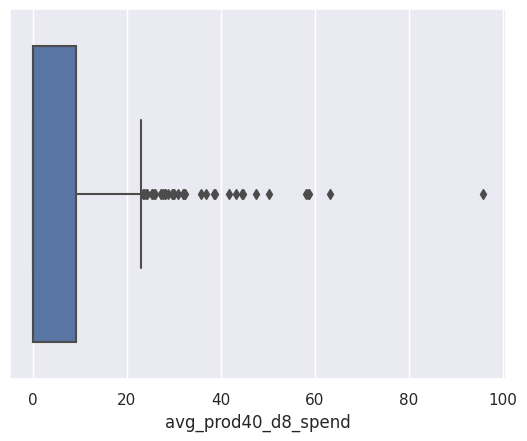

avg_prod40_d9_spend: 


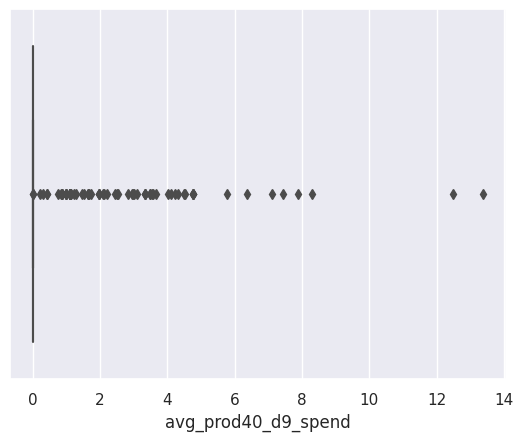

prop_basket_s: 


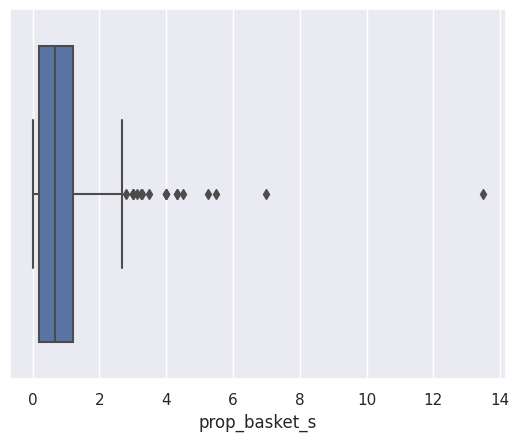

prop_basket_m: 


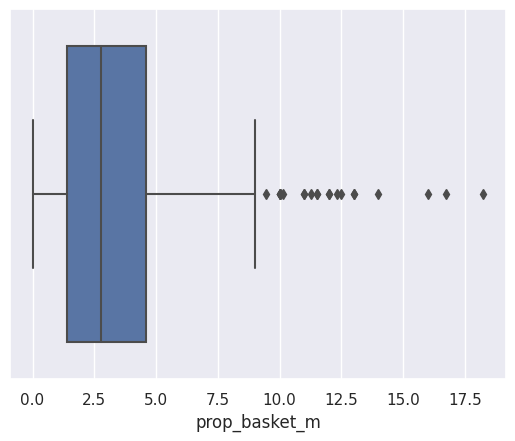

prop_basket_l: 


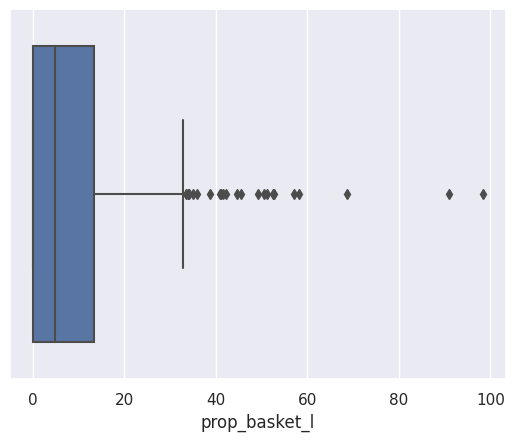

prop_small_shop: 


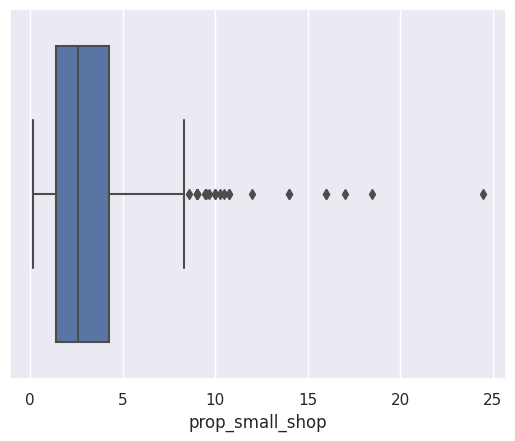

prop_full_shop: 


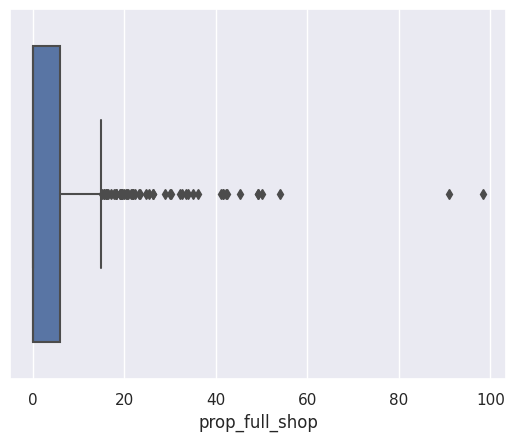

prop_top_up: 


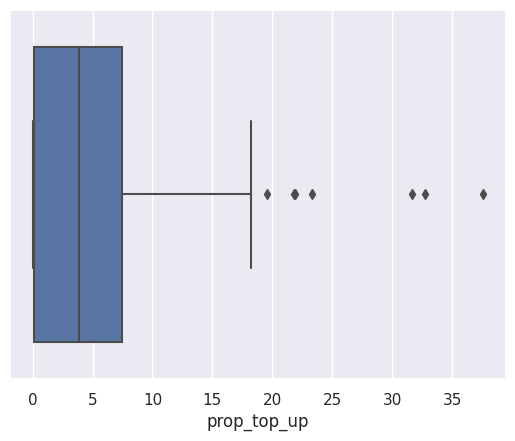

avg_dom_fresh_spend: 


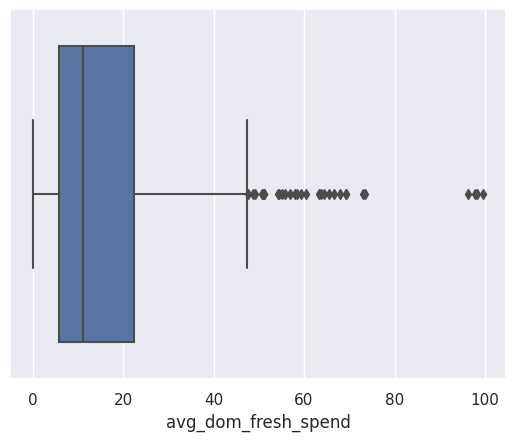

avg_dom_mixed_spend: 


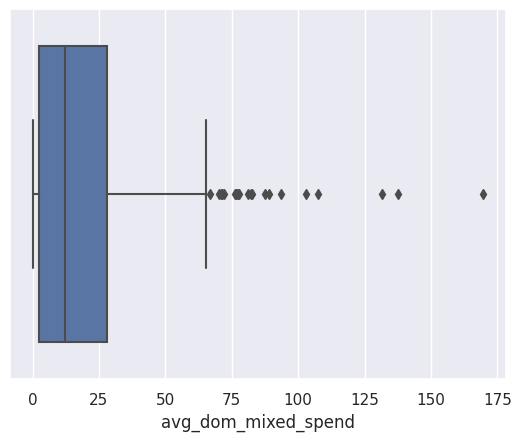

avg_dom_grocery_spend: 


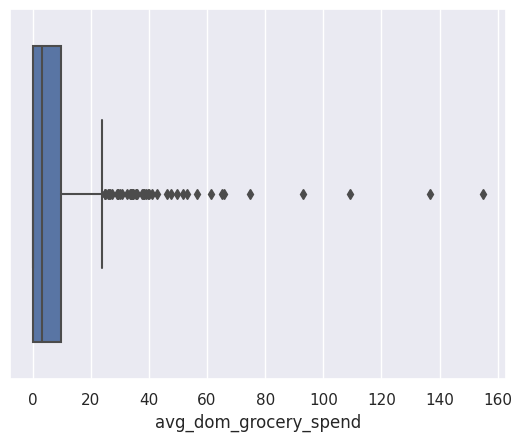

avg_dom_nonfood_spend: 


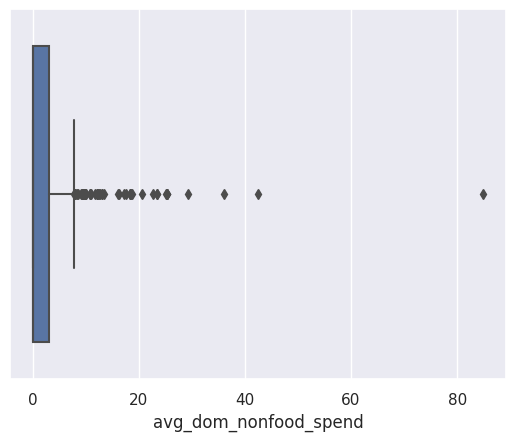

In [7]:
list1 = ['dur_from_last_date', 'weekday_count', 'holiday_count',
       'shop_morning_count', 'shop_afternoon_count', 'shop_evening_count',
       'shop_night_count', 'no_of_visit', 'mtbp', 'no_visit_week',
       'avg_weekly_visit', 'percent_active_weeks', 'total_spend',
       'avg_weekly_spend', 'avg_spend', 'std_spend', 'spend_last_1_mth',
       'spend_last_3_mth', 'spend_last_6_mth', 'arpu', 'avg_prod40_d1_spend',
       'avg_prod40_d2_spend', 'avg_prod40_d3_spend', 'avg_prod40_d4_spend',
       'avg_prod40_d5_spend', 'avg_prod40_d6_spend', 'avg_prod40_d7_spend',
       'avg_prod40_d8_spend', 'avg_prod40_d9_spend', 'prop_basket_s',
       'prop_basket_m', 'prop_basket_l', 'prop_small_shop', 'prop_full_shop',
       'prop_top_up', 'avg_dom_fresh_spend', 'avg_dom_mixed_spend',
       'avg_dom_grocery_spend', 'avg_dom_nonfood_spend']

for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=df[str(i)])
    plt.show()

##Data processing

In [8]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical column
df['lifestage_labeled'] = label_encoder.fit_transform(df['cust_lifestage'])

In [9]:
df.drop('cust_lifestage', axis=1, inplace=True)

In [10]:
new_df = df[['dur_from_last_date', 'weekday_count', 'holiday_count',
       'shop_morning_count', 'shop_afternoon_count', 'shop_evening_count',
       'shop_night_count', 'no_of_visit', 'mtbp', 'no_visit_week',
       'avg_weekly_visit', 'percent_active_weeks', 'total_spend',
       'avg_weekly_spend', 'avg_spend', 'std_spend', 'spend_last_1_mth',
       'spend_last_3_mth', 'spend_last_6_mth', 'arpu', 'avg_prod40_d1_spend',
       'avg_prod40_d2_spend', 'avg_prod40_d3_spend', 'avg_prod40_d4_spend',
       'avg_prod40_d5_spend', 'avg_prod40_d6_spend', 'avg_prod40_d7_spend',
       'avg_prod40_d8_spend', 'avg_prod40_d9_spend', 'prop_basket_s',
       'prop_basket_m', 'prop_basket_l', 'prop_small_shop', 'prop_full_shop',
       'prop_top_up', 'avg_dom_fresh_spend', 'avg_dom_mixed_spend',
       'avg_dom_grocery_spend', 'avg_dom_nonfood_spend', 'lifestage_labeled']]

In [11]:
#Remove outliers

z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [12]:
num_features = new_df[['dur_from_last_date', 'weekday_count', 'holiday_count',
       'shop_morning_count', 'shop_afternoon_count', 'shop_evening_count',
       'shop_night_count', 'no_of_visit', 'mtbp', 'no_visit_week',
       'avg_weekly_visit', 'percent_active_weeks', 'total_spend',
       'avg_weekly_spend', 'avg_spend', 'std_spend', 'spend_last_1_mth',
       'spend_last_3_mth', 'spend_last_6_mth', 'arpu', 'avg_prod40_d1_spend',
       'avg_prod40_d2_spend', 'avg_prod40_d3_spend', 'avg_prod40_d4_spend',
       'avg_prod40_d5_spend', 'avg_prod40_d6_spend', 'avg_prod40_d7_spend',
       'avg_prod40_d8_spend', 'avg_prod40_d9_spend', 'prop_basket_s',
       'prop_basket_m', 'prop_basket_l', 'prop_small_shop', 'prop_full_shop',
       'prop_top_up', 'avg_dom_fresh_spend', 'avg_dom_mixed_spend',
       'avg_dom_grocery_spend', 'avg_dom_nonfood_spend', 'lifestage_labeled']]

In [13]:
# Scale numerical features
scaler = StandardScaler()
scaled_num_features = scaler.fit_transform(num_features)

# Create a new DataFrame with scaled features
scaled_num_df = pd.DataFrame(num_features, columns=num_features.columns)

# Display statistical properties of scaled numerical features
print("Statistical properties of scaled numerical features:")
print(scaled_num_df.describe())


Statistical properties of scaled numerical features:
       dur_from_last_date  weekday_count  holiday_count  shop_morning_count  \
count          355.000000     355.000000     355.000000          355.000000   
mean            88.453521       7.923944       3.019718            2.028169   
std            110.395872       4.248279       1.964992            2.128445   
min              0.000000       0.000000       0.000000            0.000000   
25%             20.000000       5.000000       2.000000            0.000000   
50%             49.000000       7.000000       3.000000            1.000000   
75%             92.500000      11.000000       4.000000            3.000000   
max            492.000000      22.000000      10.000000            9.000000   

       shop_afternoon_count  shop_evening_count  shop_night_count  \
count            355.000000          355.000000        355.000000   
mean               4.205634            2.676056          2.163380   
std                3.164951 

## PCA

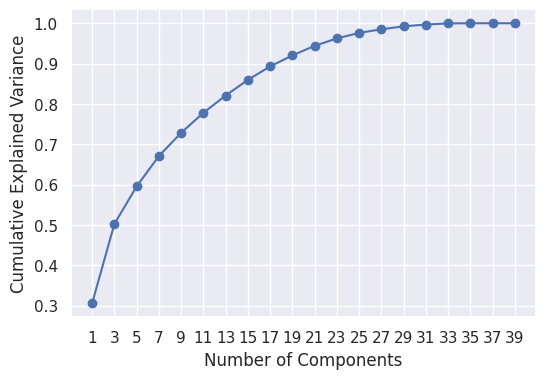

In [14]:
pca = PCA()

pca.fit(scaled_num_features)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Define the range and step size for X-axis ticks
start = 1
end = len(cumulative_variance) + 1
step = 2

plt.figure(figsize=(6, 4))
plt.plot(range(start, end, step), cumulative_variance[start-1::step], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Set the X-axis ticks to the specified range
plt.xticks(range(start, end, step))

# Display scree plot
plt.show()

In [15]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(scaled_num_features)

# Create a DataFrame to hold the PCA results with meaningful column names
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     355 non-null    float64
 1   PC2     355 non-null    float64
 2   PC3     355 non-null    float64
 3   PC4     355 non-null    float64
 4   PC5     355 non-null    float64
 5   PC6     355 non-null    float64
 6   PC7     355 non-null    float64
 7   PC8     355 non-null    float64
 8   PC9     355 non-null    float64
 9   PC10    355 non-null    float64
 10  PC11    355 non-null    float64
 11  PC12    355 non-null    float64
 12  PC13    355 non-null    float64
 13  PC14    355 non-null    float64
 14  PC15    355 non-null    float64
 15  PC16    355 non-null    float64
 16  PC17    355 non-null    float64
 17  PC18    355 non-null    float64
 18  PC19    355 non-null    float64
 19  PC20    355 non-null    float64
 20  PC21    355 non-null    float64
dtypes: float64(21)
memory usage: 58.4 KB


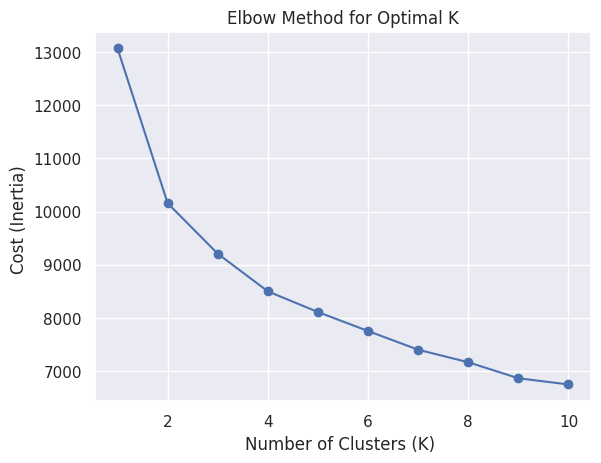

In [16]:
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, n_init=50)
  kmeans.fit(pca_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (K) ')
plt.ylabel('Cost (Inertia) ')
plt.title('Elbow Method for Optimal K')
plt.show()

###Perform K-means clustering (PCA)

In [17]:
# Choose K=4

k=4

kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
cluster_labels = kmeans.fit_predict(pca_df)

new_df['Cluster'] = cluster_labels

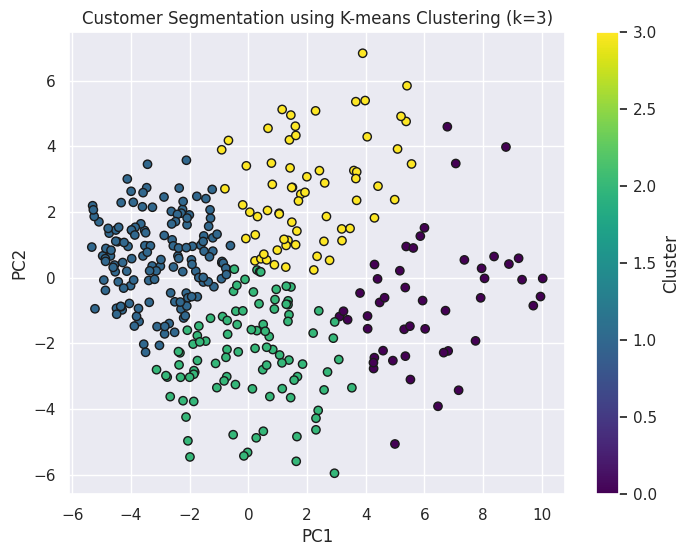

In [18]:
#Visualize clusters using scatter plot

#Add the cluster labels to the pca_df
pca_df['Cluster'] = cluster_labels

feature1= 'PC1'
feature2 = 'PC2'

plt.figure(figsize=(8,6))
plt.scatter(pca_df[feature1], pca_df[feature2], c=pca_df['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Customer Segmentation using K-means Clustering (k=3)')
plt.colorbar(label='Cluster')
plt.show()

###Find importance (PCA)

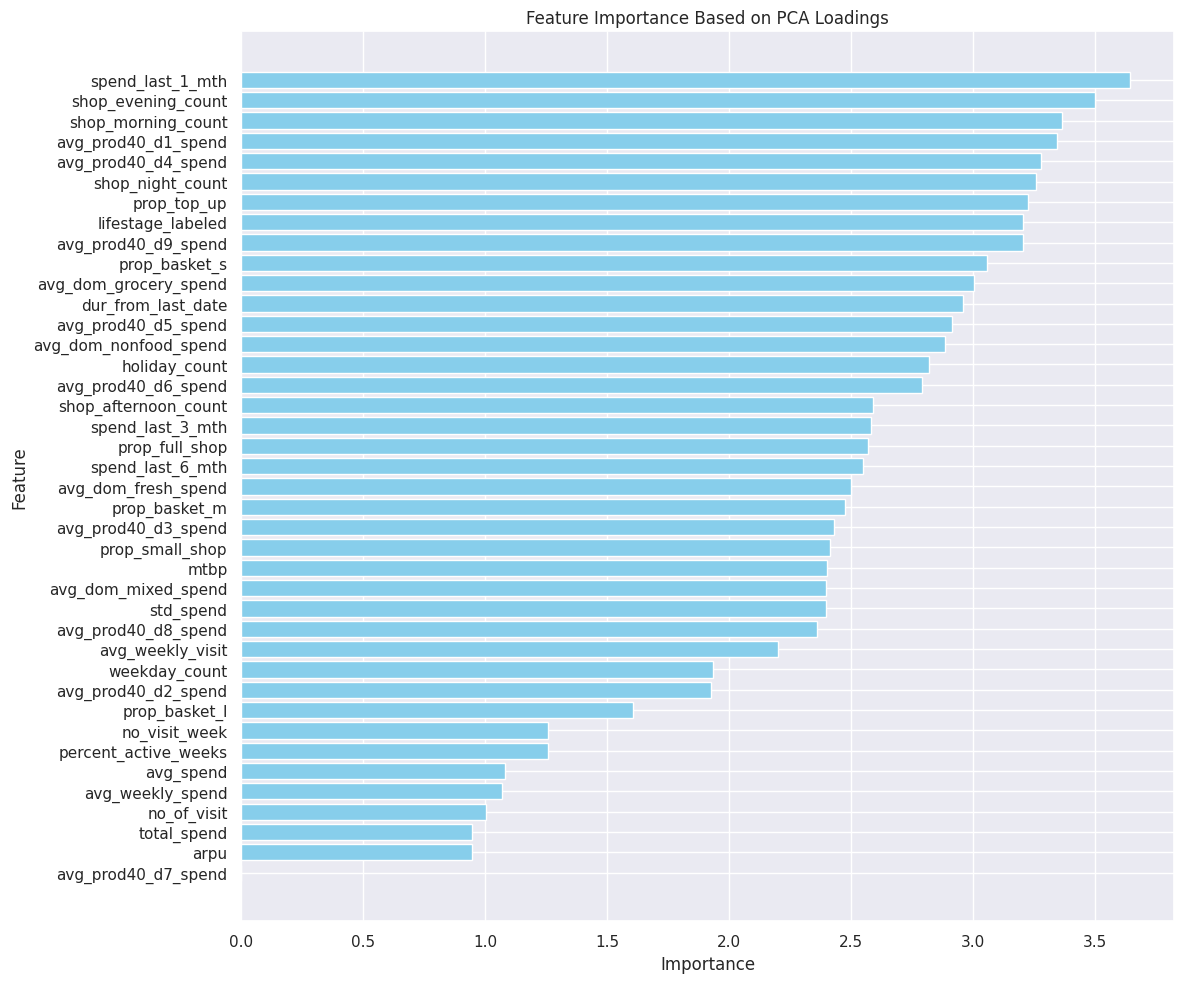

Feature Importance:
                  Feature    Importance
16       spend_last_1_mth  3.641334e+00
5      shop_evening_count  3.498304e+00
3      shop_morning_count  3.362773e+00
20    avg_prod40_d1_spend  3.343288e+00
23    avg_prod40_d4_spend  3.278740e+00
6        shop_night_count  3.259991e+00
34            prop_top_up  3.223485e+00
39      lifestage_labeled  3.206028e+00
28    avg_prod40_d9_spend  3.204681e+00
29          prop_basket_s  3.058106e+00
37  avg_dom_grocery_spend  3.003326e+00
0      dur_from_last_date  2.957493e+00
24    avg_prod40_d5_spend  2.912927e+00
38  avg_dom_nonfood_spend  2.884374e+00
2           holiday_count  2.818475e+00
25    avg_prod40_d6_spend  2.791731e+00
4    shop_afternoon_count  2.590695e+00
17       spend_last_3_mth  2.583906e+00
33         prop_full_shop  2.569982e+00
18       spend_last_6_mth  2.550312e+00
35    avg_dom_fresh_spend  2.501243e+00
30          prop_basket_m  2.475421e+00
22    avg_prod40_d3_spend  2.431566e+00
32        prop_small

In [19]:
# Feature importance
# Initialize PCA with the desired number of components
n_components = 21
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
pca.fit(scaled_num_features)

# Get the principal component loadings (coefficients)
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature (a measure of importance)
feature_importance = np.abs(loadings).sum(axis=0)

# Create a DataFrame to display feature importance
original_feature_names = num_features.columns
feature_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Based on PCA Loadings')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.show()

# Display the sorted feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df)

##Visualization

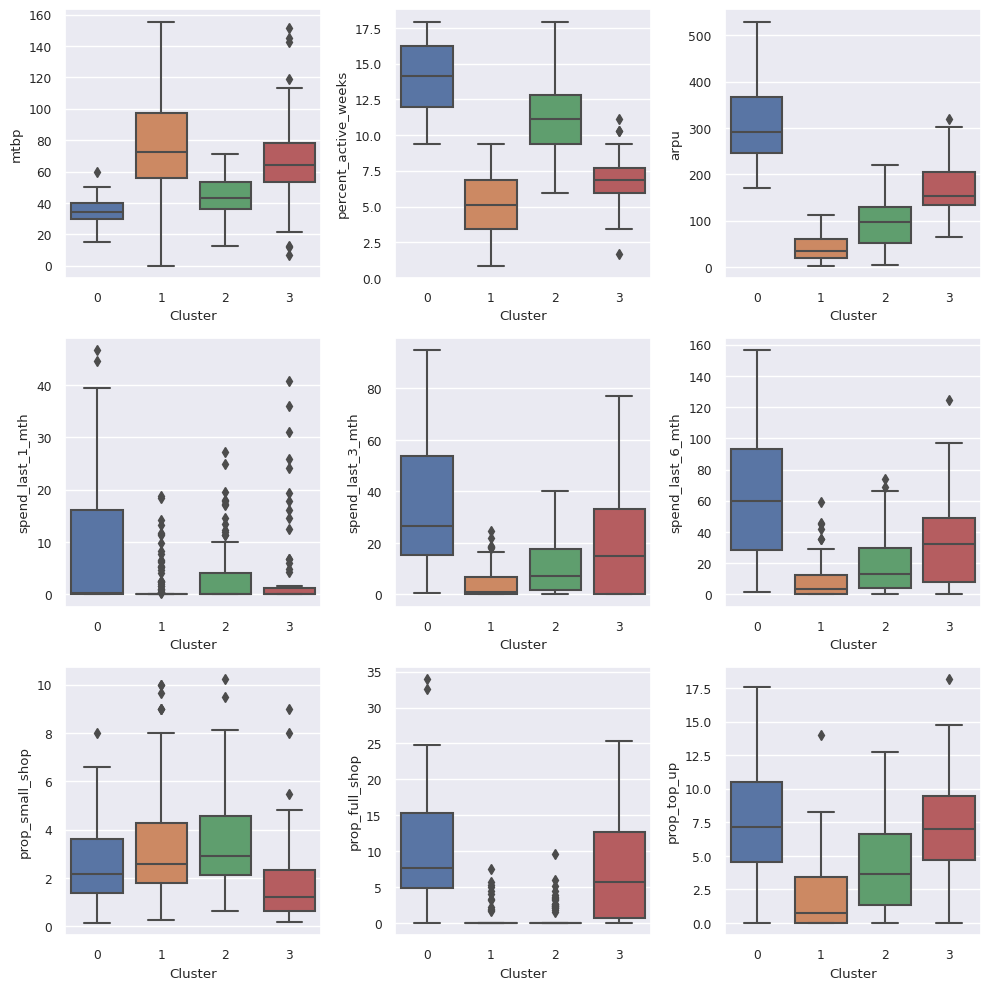

In [20]:
sns.set(font_scale=0.8)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

sns.boxplot(data=new_df, x='Cluster', y='mtbp', ax=axes[0,0])
sns.boxplot(data=new_df, x='Cluster', y='percent_active_weeks', ax=axes[0,1])
sns.boxplot(data=new_df, x='Cluster', y='arpu', ax=axes[0,2])
sns.boxplot(data=new_df, x='Cluster', y='spend_last_1_mth', ax=axes[1,0])
sns.boxplot(data=new_df, x='Cluster', y='spend_last_3_mth', ax=axes[1,1])
sns.boxplot(data=new_df, x='Cluster', y='spend_last_6_mth', ax=axes[1,2])
sns.boxplot(data=new_df, x='Cluster', y='prop_small_shop', ax=axes[2,0])
sns.boxplot(data=new_df, x='Cluster', y='prop_full_shop', ax=axes[2,1])
sns.boxplot(data=new_df, x='Cluster', y='prop_top_up', ax=axes[2,2])

plt.tight_layout()

plt.show()